In [9]:
!pip install numpy

   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
    --------------------------------------- 0.3/12.7 MB ? eta -:--:--
    --------------------------------------- 0.3/12.7 MB ? eta -:--:--
    --------------------------------------- 0.3/12.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.7 MB 400.1 kB/s eta 0:00:31
   - -------------------------------------- 0.5/12.7 MB 400.1 kB/s eta 0:00:31
   - -------------------------------------- 0.5/12.7 MB 400.1 kB/s eta 0:00:31
   -- ------------------------------------- 0.8/12.7 MB 396.7 kB/s eta 0:00:31
   -- ------------------------------------- 0.8/12.7 MB 396.7 kB/s eta 0:00:31
   -- ------------------------------------- 0.8/12.7 MB 396.7 kB/s eta 0:00:31
   --- -----------------------------

In [3]:
!pip install pandas

In [4]:
import numpy as np
import pandas as pd

In [5]:
np.random.seed(42)

In [20]:
apartments=[f"Apt-{i}"for i in range(1,21)]

In [21]:
dates=pd.date_range(start="2025-07-01",periods=30,freq="D")

In [23]:
data={
    "Date":np.tile(dates,len(apartments)),
    "Apartment":np.repeat(apartments,len(dates)),
    "Electricity_usage":np.random.normal(loc=20,scale=5,size=len(dates)* len(apartments))
}

In [24]:
df=pd.DataFrame(data)
df

,Date,Apartment,Electricity_usage
0,2025-07-01,Apt-1,20.626123
1,2025-07-02,Apt-1,17.852972
2,2025-07-03,Apt-1,20.611488
3,2025-07-04,Apt-1,22.716490
4,2025-07-05,Apt-1,20.244300
...,...,...,...
595,2025-07-26,Apt-20,16.240153
596,2025-07-27,Apt-20,18.404730
597,2025-07-28,Apt-20,16.019871
598,2025-07-29,Apt-20,25.380036


In [25]:
print(df.dtypes)

Date                 datetime64[ns]
Apartment                    object
Electricity_usage           float64
dtype: object


In [26]:
usage_per_apartment = df.groupby("Apartment")["Electricity_usage"].sum().sort_values(ascending=False)
print(usage_per_apartment)

Apartment
Apt-15    645.670990
Apt-8     645.512291
Apt-10    643.788736
Apt-9     637.204478
Apt-19    632.450035
Apt-7     630.204069
Apt-4     623.991131
Apt-16    623.570963
Apt-17    622.528393
Apt-11    620.019817
Apt-18    614.477831
Apt-1     612.333467
Apt-2     597.521363
Apt-14    591.522784
Apt-5     590.737621
Apt-3     588.399003
Apt-12    580.010205
Apt-13    570.677657
Apt-6     567.886149
Apt-20    563.305884
Name: Electricity_usage, dtype: float64


In [27]:
usage_per_apartment = df.groupby("Apartment")["Electricity_usage"].sum().sort_values(ascending=False)
print(usage_per_apartment)

Date
2025-07-01    21.308854
2025-07-02    18.602625
2025-07-03    19.674949
2025-07-04    21.926896
2025-07-05    18.815747
Name: Electricity_usage, dtype: float64


In [28]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

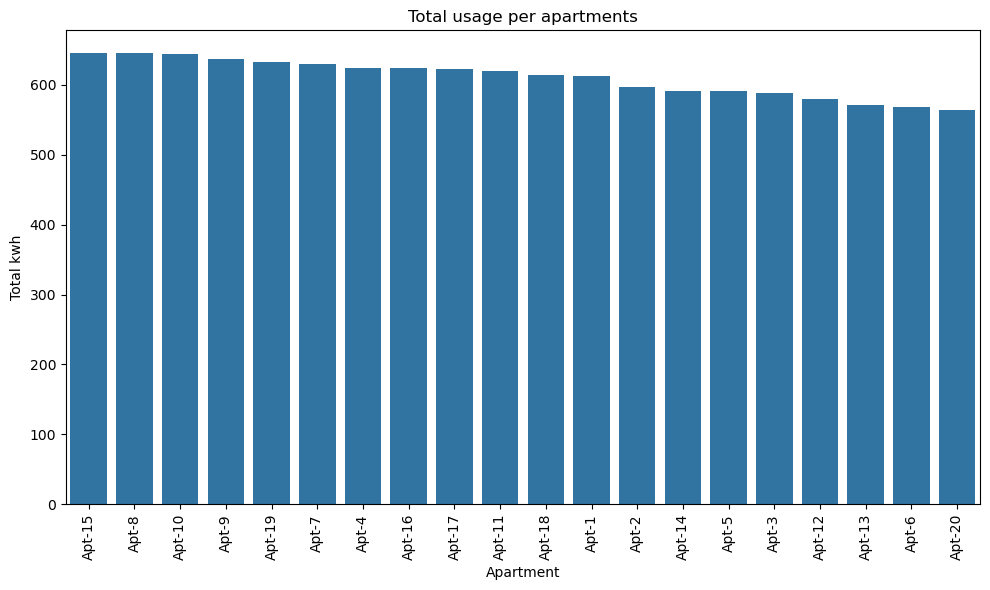

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x=usage_per_apartment.index,y=usage_per_apartment.values)
plt.xticks(rotation = 90)
plt.title("Total usage per apartments")
plt.xlabel("Apartment")
plt.ylabel("Total kwh")
plt.tight_layout()
plt.show()


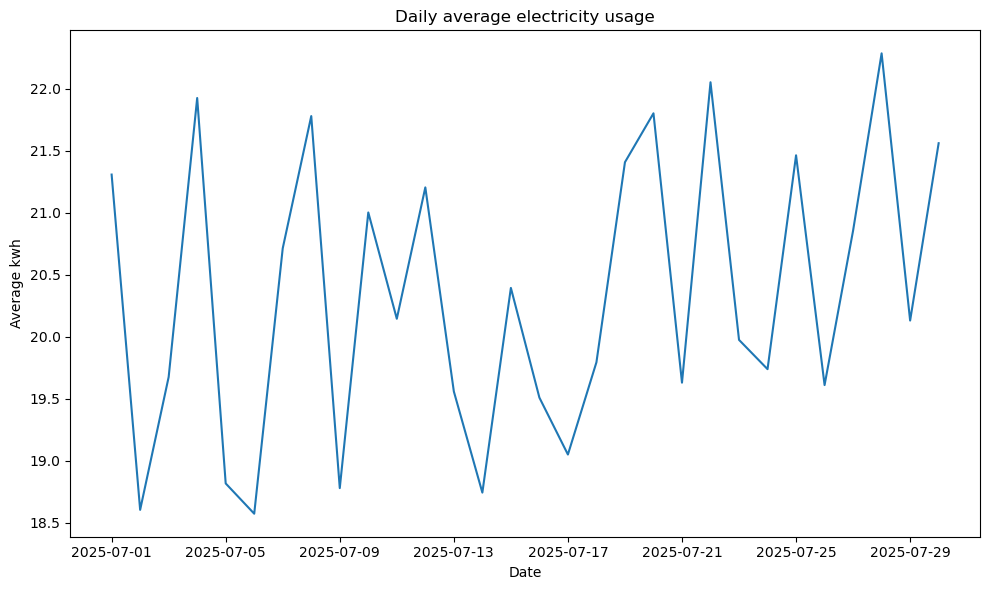

In [35]:
plt.figure(figsize=(10,6))
sns.lineplot(x=daily_avg.index,y=daily_avg.values)
plt.title("Daily average electricity usage")
plt.xlabel("Date")
plt.ylabel("Average kwh")
plt.tight_layout()
plt.show()

In [41]:
threshold= df["Electricity_usage"].mean()+2 *df ["Electricity_usage"].std()

df["High_usage_flag"]=df["Electricity_usage"] > threshold

print(df[df["High_usage_flag"]==True].head())

         Date Apartment  Electricity_usage  HIgh_Usage_Flag  High_Usage_Flag  \
19 2025-07-20     Apt-1          30.725746             True             True   
29 2025-07-30     Apt-1          31.052615             True             True   
33 2025-07-04     Apt-2          32.898547             True             True   
76 2025-07-17     Apt-3          31.596648             True             True   
91 2025-07-02     Apt-4          32.464998             True             True   

    High_usage_flag  
19             True  
29             True  
33             True  
76             True  
91             True  
